In [9]:
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  ghostscript gsfonts javascript-common libcupsfilters1 libcupsimage2 libgs9
  libgs9-common libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0
  libptexenc1 libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | lighttpd | httpd poppler-u

In [11]:
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 1s (34.6 MB/s)
Selecting previously unselected package cm-super-minimal.
(Reading database ... 149830 files and directories 

In [2]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import misc

plt.rcParams['text.usetex'] = False

In [3]:
def series_sum(D,h, lower_bound, upper_bound):
    values = np.linspace(lower_bound, upper_bound, 100)
    interpolant = np.zeros(shape = 100)
    i = 0
    for x in values:
        sum = 0
        for m in range(-10000, 10001):
            exponent = -((x-m*h)*(x-m*h))/(D*h*h)
            sum += 1/math.sqrt(math.pi*D) * math.sin(m*h) * math.exp(exponent)
        interpolant[i] = sum
        i += 1
    return values, interpolant 

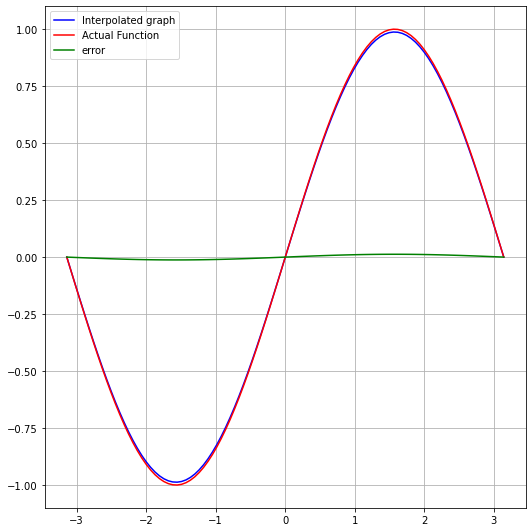

In [4]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
   return np.sin(x)

x = np.linspace(-math.pi, math.pi, 100)

plt.grid()
values, interpolant = series_sum(5, 0.1, -math.pi, math.pi)
plt.plot(values, interpolant, color = 'blue', label = 'Interpolated graph')
plt.plot(x, f(x), color = 'red', label = 'Actual Function')
plt.plot(x, f(x) - interpolant, color = 'green', label = 'error')
plt.legend()
plt.show()

In [5]:
def quasi_interpolant(x,y, D, h):
    # Inputs the values of x, y and gives the infinite sum of the series
    sum = 0
    for m1 in range(-100, 101):
        for m2 in range(-100, 101):
            exponent = -((x-m1*h)**2+(y-m2*h)**2)/(D*h**2)
            sum += 1/(math.pi * D) * (1.464*m1*h+5.90*m2*h) * math.exp(exponent)
    return sum

In [6]:
X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)

In [7]:
coord_rect = []
for x in X:
    for y in Y:
        if (y - 0.692*x + 5 > 0 ) and (y - 0.692*x - 5 < 0) and (-y - x / 0.692 - 6 < 0) and (-y - x / 0.692 + 6 > 0):
            coord_rect.append([x, y])
print(len(coord_rect))

30816


In [8]:
ellipse_coord = []
for x,y in coord_rect:
    if(1.7363*x*x + 2*.3660*x*y + 1.4729*y*y < 15.8091):
        ellipse_coord.append([x,y])
print(len(ellipse_coord))

19742


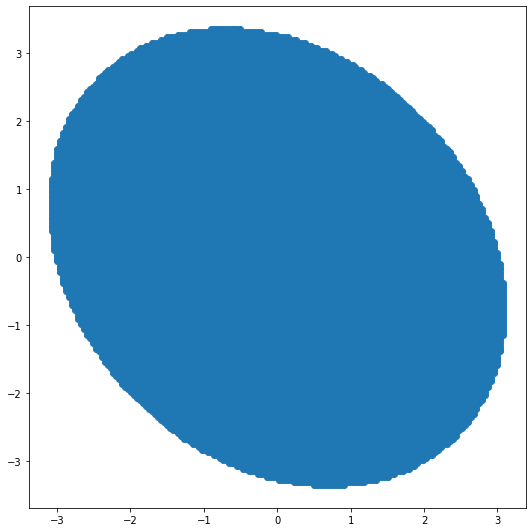

In [9]:
np_coord_ellipse = np.array(ellipse_coord)

fig = plt.figure()
# Set the figure size
plt.rcParams["figure.figsize"] = [9.0, 9.0]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension

# Scatter plot
plt.scatter(np_coord_ellipse[:, 0], np_coord_ellipse[:, 1])

# Display the plot
plt.show()

In [10]:
print(np_coord_ellipse)

[[-3.07537688  0.38190955]
 [-3.07537688  0.42211055]
 [-3.07537688  0.46231156]
 ...
 [ 3.07537688 -0.46231156]
 [ 3.07537688 -0.42211055]
 [ 3.07537688 -0.38190955]]


In [11]:
actual_feedback = 1.464*np_coord_ellipse[:, 0] + 5.90*np_coord_ellipse[:, 1]
print(actual_feedback)

[-2.24908543 -2.0118995  -1.77471357 ...  1.77471357  2.0118995
  2.24908543]


In [12]:
# quasi_feedback = np.array([quasi_interpolant(x,y,5, 0.1) for (x,y) in np_coord_ellipse])
quasi_feedback = np.loadtxt("feedback_5_e-1.txt")

In [13]:
print(np.max(quasi_feedback - actual_feedback))
print(np.min(quasi_feedback - actual_feedback))

6.394884621840902e-14
-6.039613253960852e-14


In [14]:
error = np.abs(quasi_feedback - actual_feedback)
print(error)

[0.00000000e+00 1.33226763e-15 1.33226763e-15 ... 3.10862447e-15
 1.77635684e-15 3.55271368e-15]


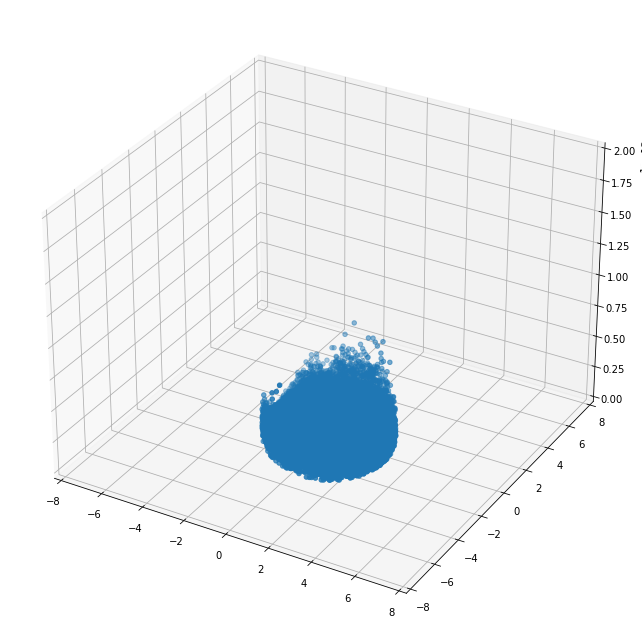

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points
ax.scatter3D(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='Greens');


ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [16]:
print(np_coord_ellipse)

[[-3.07537688  0.38190955]
 [-3.07537688  0.42211055]
 [-3.07537688  0.46231156]
 ...
 [ 3.07537688 -0.46231156]
 [ 3.07537688 -0.42211055]
 [ 3.07537688 -0.38190955]]


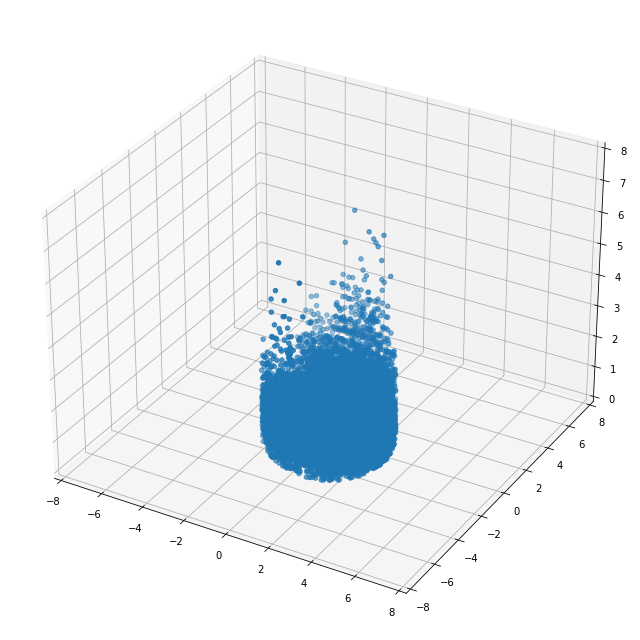

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points
ax.scatter3D(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='Greens');


ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(0, 8e-14)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


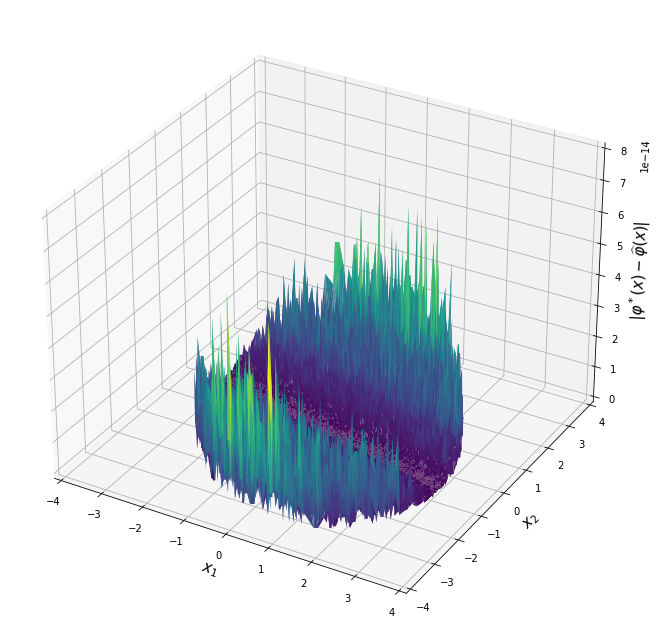

In [27]:
plt.rcParams["figure.figsize"] = [9.0, 9.0]
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points


ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='viridis', edgecolor='none')

ax.set_zlabel(r'$\left|\varphi^*(x)-\widehat{\varphi}(x)\right|$', rotation = 0, fontsize = 15)
ax.set_xlabel(r'$\it{x}_1$', fontsize = 15)
ax.set_ylabel(r'$\it{x}_2$', fontsize = 15)

ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 8e-14)
plt.savefig('error_plot.eps', format='eps')
plt.show()

In [19]:
print(quasi_feedback.shape)
print(np_coord_ellipse.shape)

(19742,)
(19742, 2)


In [21]:
graph_plot = np.zeros(shape = (100,100))

In [22]:
graph_X = np.linspace(-3,3,100)
graph_Y = np.linspace(-0.3, 0.3, 100)

In [ ]:
i = 0
for x in graph_X:
    j = 0
    for y in graph_Y:
        graph_plot[i][j] = quasi_interpolant(x,y,5, 0.1)
        j += 1
    i += 1

KeyboardInterrupt: 

In [53]:
print(graph_plot.shape)


(100, 100)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


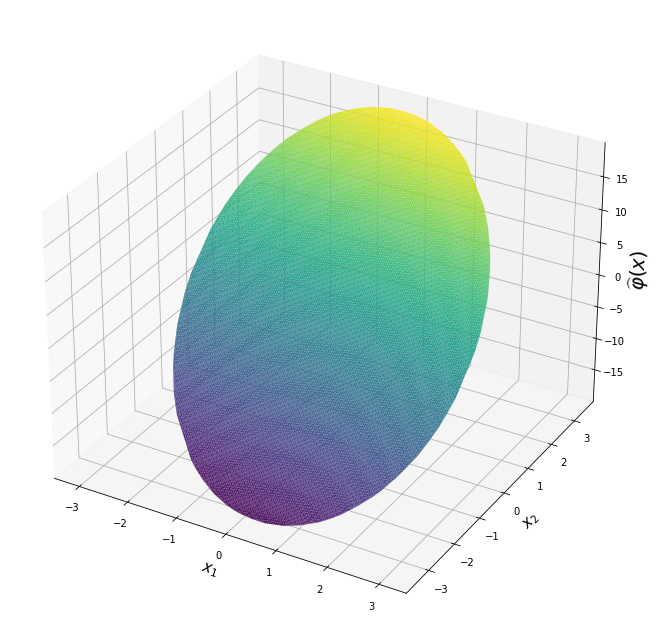

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], quasi_feedback, cmap='viridis', edgecolor='none')

ax.set_zlabel(r'$\widehat{\varphi}(x)$', rotation = 0, fontsize = 20)
ax.set_xlabel(r'$\it{x}_1$', fontsize = 15)
ax.set_ylabel(r'$\it{x}_2$', fontsize = 15)
plt.savefig('systh_feedback.eps', format='eps')
plt.show()

In [24]:
actual_graph_plot = 1.464*np_coord_ellipse[:, 0] + 5.90*np_coord_ellipse[:, 1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


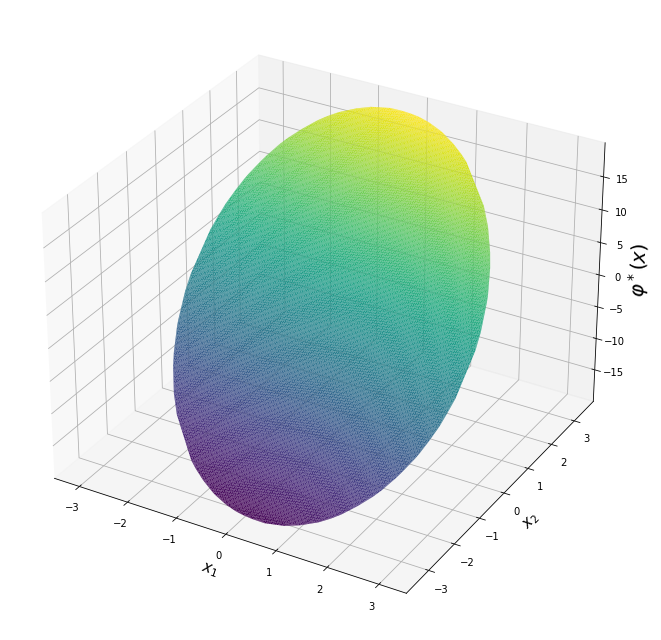

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], actual_graph_plot, cmap='viridis', edgecolor='none')

ax.set_zlabel(r'${\varphi}^*(x)$', rotation = 0, fontsize = 20)
ax.set_xlabel(r'$\it{x}_1$', fontsize = 15)
ax.set_ylabel(r'$\it{x}_2$', fontsize = 15)

plt.savefig('analytic_feedback.eps', format='eps')

plt.show()